In [3]:
import numpy as np
from scipy.stats import norm, uniform
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

def normalize(array):
    return (array - np.min(array))/ (np.max(array)-np.min(array))

In [36]:
p_list = []
f_list = np.array([0.6, 0.3, 0.5])
#f_list = normalize([90,470,100])
locs = [0.3, 0.4, 0.7]
scale=0.05

for loc in locs:
    p_list.append(norm(loc=loc, scale=scale))
    
def sum_p(x, p_list, norm=False):
    s = np.sum([p.pdf(x) for p in p_list], axis=0)
    if norm is False:
        return s
    else:
        return s / np.sum(s)
    

def sum_f_p(x, p_list, f_list, norm=False):
    s_denom = np.sum([p.pdf(x) for p in p_list], axis=0)
    s = np.sum([p.pdf(x)*f for p, f in zip(p_list, f_list)], axis=0)
    if norm is False:
        return s
    else:
        return s / s_denom
    
x = np.linspace(0,1,1000)

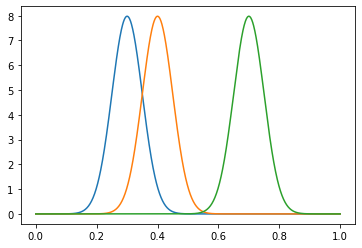

In [37]:
for p in p_list:
    plt.plot(x, p.pdf(x))

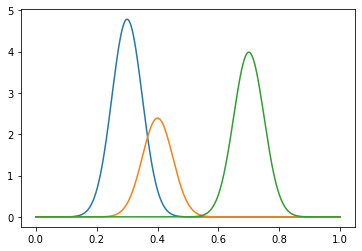

In [38]:
for p, f in zip(p_list, f_list):
    plt.plot(x, p.pdf(x) * f)

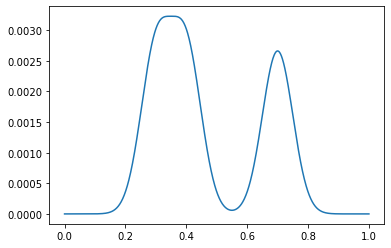

In [39]:
plt.plot(x, sum_p(x, p_list, norm=True))

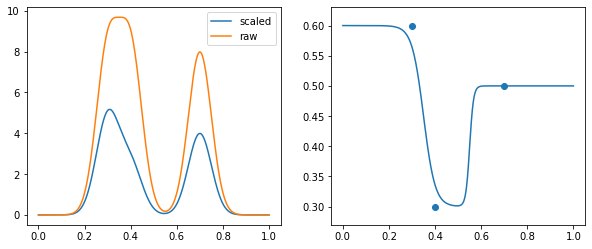

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax1.plot(x, sum_f_p(x, p_list, f_list, norm=False), label='scaled')
ax1.plot(x, sum_p(x, p_list, norm=False), label='raw')

ax2.scatter(locs, f_list)
ax2.plot(x, sum_f_p(x, p_list, f_list)/sum_p(x, p_list))

ax1.legend()

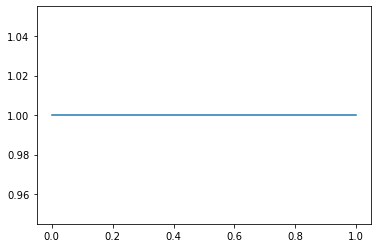

In [14]:
unif = uniform()
plt.plot(x, unif.pdf(x))

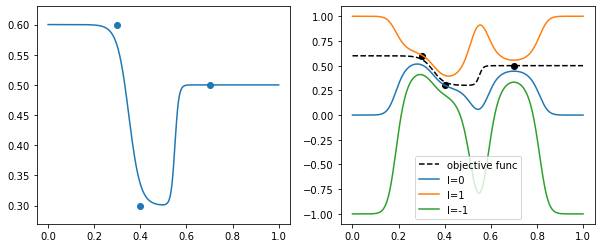

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax1.scatter(locs, f_list)
ax1.plot(x, sum_f_p(x, p_list, f_list)/sum_p(x, p_list))


ax2.plot(x, sum_f_p(x, p_list, f_list)/sum_p(x, p_list), label='objective func', color='k', linestyle='--')


def acquisition(x, p_list, f_list, l=0):    
    numerator = sum_f_p(x, p_list, f_list) + l*(unif.pdf(x))
    denominator = sum_p(x, p_list) + unif.pdf(x)
    y = numerator / denominator
    return y

#l = 0
#numerator = sum_f_p(x, p_list, f_list) + l*(unif.pdf(x))
#denominator = sum_p(x, p_list) + unif.pdf(x)
#y = numerator / denominator

y = acquisition(x, p_list, f_list, l=0)
ax2.plot(x, y, label='l=0')
ax2.scatter(locs, f_list, color='k')

#l = 1
#numerator = sum_f_p(x, p_list, f_list) + l*(unif.pdf(x))
#denominator = sum_p(x, p_list) + unif.pdf(x)
#y = numerator / denominator

y = acquisition(x, p_list, f_list, l=1)
ax2.plot(x, y, label='l=1')
ax2.legend()

#l = -1
#numerator = sum_f_p(x, p_list, f_list) + l*(unif.pdf(x))
#denominator = sum_p(x, p_list) + unif.pdf(x)
#y = numerator / denominator

y = acquisition(x, p_list, f_list, l=-1)
ax2.plot(x, y, label='l=-1')
ax2.legend()

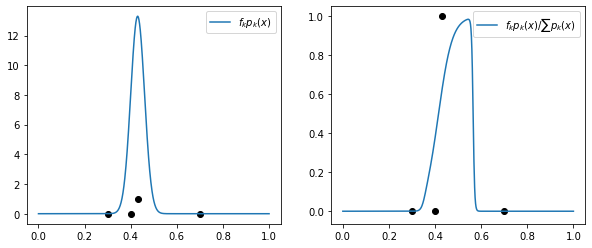

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

v_feas = 0
v_unfs = 1

# say 0.6 is infeasible
feasible = [0.3, 0.4, 0.7]
infeasible = [0.43]
ax1.scatter(feasible, [v_feas]*len(feasible), color='k')
ax1.scatter(infeasible, [v_unfs]*len(infeasible), color='k')

feas_p_list = []
feas_f_list = []
scale = 0.03

for loc in feasible:
    feas_p_list.append(norm(loc=loc, scale=scale))
    feas_f_list.append(v_feas)

for loc in infeasible:
    feas_p_list.append(norm(loc=loc, scale=scale))
    feas_f_list.append(v_unfs)

ax1.plot(x, sum_f_p(x, feas_p_list, feas_f_list), label='$f_k p_k(x)$')

ax2.scatter(feasible, [v_feas]*len(feasible), color='k')
ax2.scatter(infeasible, [v_unfs]*len(infeasible), color='k')
ax2.plot(x, sum_f_p(x, feas_p_list, feas_f_list)/sum_p(x, feas_p_list), label='$f_k p_k(x) / \sum p_k(x)$')

ax1.legend()
ax2.legend()

In [10]:
# standard acquisition:
l = 0
numerator = sum_f_p(x, p_list, f_list) + l*(unif.pdf(x))
denominator = sum_p(x, p_list) + unif.pdf(x)
ax = numerator / denominator

# probability of feasibility:
cx = sum_f_p(x, feas_p_list, feas_f_list)/sum_p(x, feas_p_list)

# combine
ax_mod = ax+cx

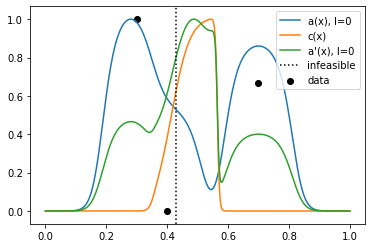

In [11]:
plt.plot(x, normalize(ax), label='a(x), l=0')
plt.plot(x, normalize(cx), label='c(x)')
plt.plot(x, normalize(ax_mod), label='a\'(x), l=0')
plt.scatter([0.3, 0.4, 0.7], normalize(np.array([0.6, 0.3, 0.5])), color='k', label='data')
for inf in infeasible:
    plt.axvline(x=inf, color='k', linestyle=':', label='infeasible')
plt.legend()

## Possible solution

In [12]:
np.random.seed(1)

x_list_0 = [0.3, 0.5, 0.55, 0.9]                  # feasible locations queried

infeasible_locs = [0.01,0.1,0.7]
x_list_1 = x_list_0 + infeasible_locs       # all locations queried

f_list_0 = np.random.uniform(size=len(x_list_0))         # f values for feasible locs
f_list_1 = [0]*len(x_list_0) + [1]*len(infeasible_locs)  # (in)feasibility of all locs

p_list_0 = []              # list of normal dists for feasible locs
p_list_1 = []              # list of normal dists for all locs


scale = 0.05
for loc in x_list_0:
    p_list_0.append(norm(loc=loc, scale=scale))
    
for loc in x_list_1:
    p_list_1.append(norm(loc=loc, scale=scale))

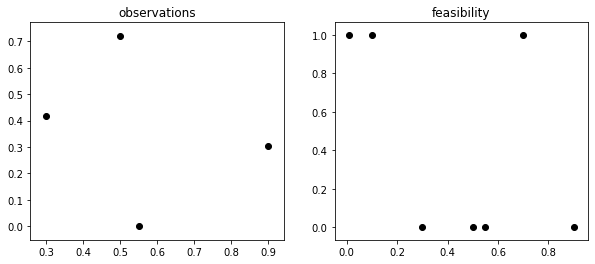

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax1.scatter(x_list_0, f_list_0, color='k')
ax2.scatter(x_list_1, f_list_1, color='k')

_ = ax1.set_title('observations')
_ = ax2.set_title('feasibility')

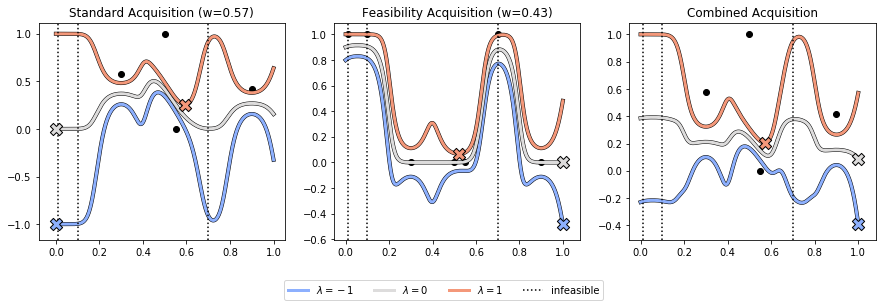

In [18]:
def objective(x, p_list, f_list):
    # standard acquisition, l=lambda
    numerator = sum_f_p(x, p_list, f_list)
    denominator = sum_p(x, p_list)
    o = numerator / denominator
    return o

def acquisition(x, l, p_list, f_list):
    # standard acquisition, l=lambda
    numerator = sum_f_p(x, p_list, f_list) + l*(unif.pdf(x))
    denominator = sum_p(x, p_list) + unif.pdf(x)
    a = numerator / denominator
    return a

def combine_acquisitions(acq0, acq1, ratio):
    return (1-ratio)*acq0 + ratio*acq1


f_list_0_norm = normalize(f_list_0)
f_list_1_norm = normalize(f_list_1)
obj0 = objective(x, p_list_0, f_list_0_norm)
obj1 = objective(x, p_list_1, f_list_1_norm)

# -----
# Plots
# -----
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax1.scatter(x_list_0, f_list_0_norm, color='k', label='observations')
ax2.scatter(x_list_1, f_list_1_norm, color='k')
ax3.scatter(x_list_0, f_list_0_norm, color='k')

# plot objectives
#ax1.plot(x, obj0, label='obj', color='k', linestyle='--')
#ax2.plot(x, obj1, label='obj', color='k', linestyle='--')

# plot a few acquisitions
for l,c in zip([-1,0,1], sns.color_palette("coolwarm", 3).as_hex()):
    acq0 = acquisition(x, l, p_list_0, f_list_0)
    acq1 = acquisition(x, l, p_list_1, f_list_1)
    
    ratio = sum(f_list_1)/len(f_list_1)
    acq  = combine_acquisitions(acq0, acq1, ratio)
    
    ax1.plot(x, acq0, color='k', linestyle='-', linewidth=4)
    ax1.plot(x, acq0, label=f'$\lambda={l}$', color=c, linestyle='-', linewidth=3)
    
    ax2.plot(x, acq1, color='k', linestyle='-', linewidth=4)
    ax2.plot(x, acq1, label=f'$\lambda={l}$', color=c, linestyle='-', linewidth=3)
    
    ax3.plot(x, acq, color='k', linestyle='-', linewidth=4)
    ax3.plot(x, acq, label=f'$\lambda={l}$', color=c, linestyle='-', linewidth=3)
    
    # highligh mins
    ax1.scatter(x[np.argmin(acq0)], acq0[np.argmin(acq0)], color=c, marker='X', zorder=10, s=150, edgecolor='k')
    ax2.scatter(x[np.argmin(acq1)], acq1[np.argmin(acq1)], color=c, marker='X', zorder=10, s=150, edgecolor='k')
    ax3.scatter(x[np.argmin(acq)],  acq[np.argmin(acq)],   color=c, marker='X', zorder=10, s=150, edgecolor='k')
    

# mark infeasible locs in ax1
for loc in infeasible_locs:
    ax1.axvline(x=loc, color='k', linestyle=':', label='infeasible')
    ax2.axvline(x=loc, color='k', linestyle=':', label='infeasible')
    ax3.axvline(x=loc, color='k', linestyle=':', label='infeasible')

#_ = ax1.set_ylim([-0.05,1.05])
#_ = ax2.set_ylim([-0.05,1.05])

_ = ax1.set_title(f'Standard Acquisition (w={1-ratio:.2f})')
_ = ax2.set_title(f'Feasibility Acquisition (w={ratio:.2f})')
_ = ax3.set_title(f'Combined Acquisition')


# this is to remove dupliacte labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
_ = ax1.legend(handles=by_label.values(), labels=by_label.keys(), loc='lower center', 
               ncol=5, bbox_transform=fig.transFigure, bbox_to_anchor=(0.5,-0.1))

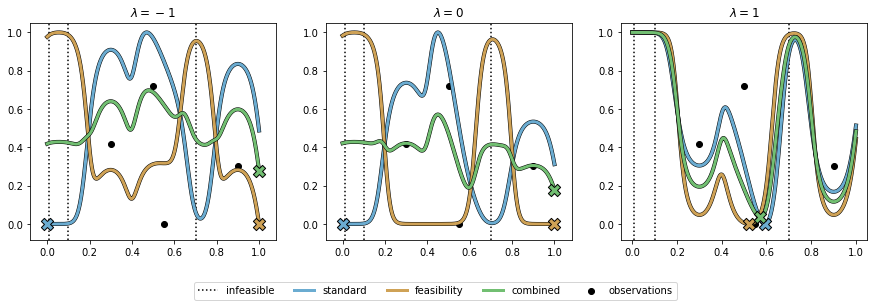

In [20]:
# ---------------------
# Plots by lambda value
# ---------------------
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

c_acq0 = sns.color_palette("RdBu_r", 3).as_hex()[0]
c_acq1 = sns.color_palette("BrBG", 3).as_hex()[0]
c_acq  = sns.light_palette("green", 3).as_hex()[1]

# plot a few acquisitions
for l, ax in zip([-1,0,1], [ax1, ax2, ax3]):
    
    # plot scatter
    ax.scatter(x_list_0, f_list_0, color='k', label='observations')
    
    # mark infeasible locs
    for loc in infeasible_locs:
        ax.axvline(x=loc, color='k', linestyle=':', label='infeasible')
    
    # plot acquisitions
    acq0 = normalize(acquisition(x, l, p_list_0, f_list_0))
    acq1 = normalize(acquisition(x, l, p_list_1, f_list_1))
    
    ratio = sum(f_list_1)/len(f_list_1)
    acq  = combine_acquisitions(acq0, acq1, ratio)
    
    ax.plot(x, acq0, color='k', linestyle='-', linewidth=4)
    ax.plot(x, acq0, label='standard', color=c_acq0, linestyle='-', linewidth=3)
    
    ax.plot(x, acq1, color='k', linestyle='-', linewidth=4)
    ax.plot(x, acq1, label='feasibility', color=c_acq1, linestyle='-', linewidth=3)
    
    ax.plot(x, acq, color='k', linestyle='-', linewidth=4)
    ax.plot(x, acq, label='combined', color=c_acq, linestyle='-', linewidth=3)
    
    # highligh mins
    ax.scatter(x[np.argmin(acq0)], acq0[np.argmin(acq0)], color=c_acq0, marker='X', zorder=10, s=150, edgecolor='k')
    ax.scatter(x[np.argmin(acq1)], acq1[np.argmin(acq1)], color=c_acq1, marker='X', zorder=10, s=150, edgecolor='k')
    ax.scatter(x[np.argmin(acq)],  acq[np.argmin(acq)],   color=c_acq, marker='X', zorder=10, s=150, edgecolor='k')
    

    #_ = ax.set_ylim([-0.05,1.05])
    _ = ax.set_title(f'$\lambda = {l}$')

# this is to remove dupliacte labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
_ = ax1.legend(handles=by_label.values(), labels=by_label.keys(), loc='lower center', 
               ncol=5, bbox_transform=fig.transFigure, bbox_to_anchor=(0.5,-0.1))

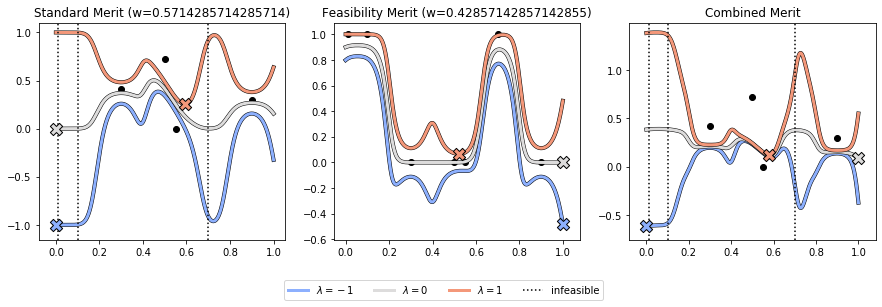

In [21]:
def acquisition_from_combined_obj(x, l, ratio, p_list_0, f_list_0, p_list_1, f_list_1):
    term0 = ((1-ratio) * sum_f_p(x, p_list_0, f_list_0)) / (sum_p(x, p_list_0) + unif.pdf(x))
    term1 = (ratio * sum_f_p(x, p_list_1, f_list_1)) / (sum_p(x, p_list_1) + unif.pdf(x))
    term2 = (l*unif.pdf(x)) / (sum_p(x, p_list_0) * sum_p(x, p_list_1)+unif.pdf(x))
    return term0 + term1 + term2

obj0 = objective(x, p_list_0, f_list_0)
obj1 = objective(x, p_list_1, f_list_1)

# -----
# Plots
# -----
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax1.scatter(x_list_0, f_list_0, color='k', label='observations')
ax2.scatter(x_list_1, f_list_1, color='k')
ax3.scatter(x_list_0, f_list_0, color='k')

# plot objectives
#ax1.plot(x, obj0, label='obj', color='k', linestyle='--')
#ax2.plot(x, obj1, label='obj', color='k', linestyle='--')

# plot a few acquisitions
for l,c in zip([-1,0,1], sns.color_palette("coolwarm", 3).as_hex()):
    acq0 = acquisition(x, l, p_list_0, f_list_0)
    acq1 = acquisition(x, l, p_list_1, f_list_1)
    
    ratio = sum(f_list_1)/len(f_list_1)
    acq  = acquisition_from_combined_obj(x, l, ratio, p_list_0, f_list_0, p_list_1, f_list_1)
    
    ax1.plot(x, acq0, color='k', linestyle='-', linewidth=4)
    ax1.plot(x, acq0, label=f'$\lambda={l}$', color=c, linestyle='-', linewidth=3)
    
    ax2.plot(x, acq1, color='k', linestyle='-', linewidth=4)
    ax2.plot(x, acq1, label=f'$\lambda={l}$', color=c, linestyle='-', linewidth=3)
    
    ax3.plot(x, acq, color='k', linestyle='-', linewidth=4)
    ax3.plot(x, acq, label=f'$\lambda={l}$', color=c, linestyle='-', linewidth=3)
    
    # highligh mins
    ax1.scatter(x[np.argmin(acq0)], acq0[np.argmin(acq0)], color=c, marker='X', zorder=10, s=150, edgecolor='k')
    ax2.scatter(x[np.argmin(acq1)], acq1[np.argmin(acq1)], color=c, marker='X', zorder=10, s=150, edgecolor='k')
    ax3.scatter(x[np.argmin(acq)],  acq[np.argmin(acq)],   color=c, marker='X', zorder=10, s=150, edgecolor='k')
    

# mark infeasible locs in ax1
for loc in infeasible_locs:
    ax1.axvline(x=loc, color='k', linestyle=':', label='infeasible')
    ax3.axvline(x=loc, color='k', linestyle=':', label='infeasible')

#_ = ax1.set_ylim([-0.05,1.05])
#_ = ax2.set_ylim([-0.05,1.05])

_ = ax1.set_title(f'Standard Merit (w={1-ratio})')
_ = ax2.set_title(f'Feasibility Merit (w={ratio})')
_ = ax3.set_title(f'Combined Merit')


# this is to remove dupliacte labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
_ = ax1.legend(handles=by_label.values(), labels=by_label.keys(), loc='lower center', 
               ncol=5, bbox_transform=fig.transFigure, bbox_to_anchor=(0.5,-0.1))

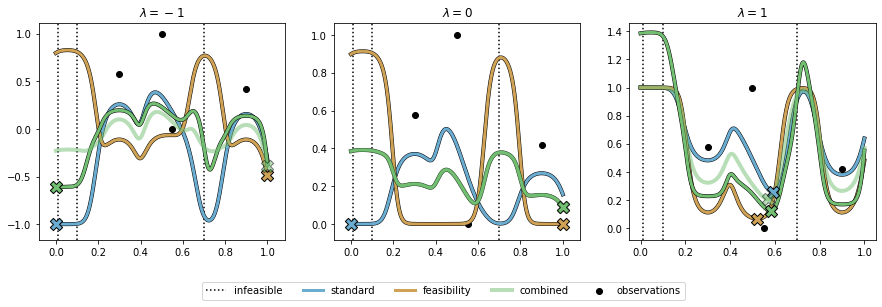

In [245]:
# ---------------------
# Plots by lambda value
# ---------------------
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

c_acq0 = sns.color_palette("RdBu_r", 3).as_hex()[0]
c_acq1 = sns.color_palette("BrBG", 3).as_hex()[0]
c_acq  = sns.light_palette("green", 3).as_hex()[1]

# plot a few acquisitions
for l, ax in zip([-1,0,1], [ax1, ax2, ax3]):
    
    # plot scatter
    ax.scatter(x_list_0, normalize(f_list_0), color='k', label='observations')
    
    # mark infeasible locs
    for loc in infeasible_locs:
        ax.axvline(x=loc, color='k', linestyle=':', label='infeasible')
    
    # plot acquisitions
    acq0 = acquisition(x, l, p_list_0, f_list_0)
    acq1 = acquisition(x, l, p_list_1, f_list_1)
    
    ratio = sum(f_list_1)/len(f_list_1)
    acq  = acquisition_from_combined_obj(x, l, ratio, p_list_0, f_list_0, p_list_1, f_list_1)
    prev_acq = combine_acquisitions(acq0, acq1, ratio)
    
    ax.plot(x, acq0, color='k', linestyle='-', linewidth=4)
    ax.plot(x, acq0, label='standard', color=c_acq0, linestyle='-', linewidth=3)
    
    ax.plot(x, acq1, color='k', linestyle='-', linewidth=4)
    ax.plot(x, acq1, label='feasibility', color=c_acq1, linestyle='-', linewidth=3)
    
    ax.plot(x, acq, color='k', linestyle='-', linewidth=4)
    ax.plot(x, acq, label='combined', color=c_acq, linestyle='-', linewidth=3)
    
    # highligh mins
    ax.scatter(x[np.argmin(acq0)], acq0[np.argmin(acq0)], color=c_acq0, marker='X', zorder=10, s=150, edgecolor='k')
    ax.scatter(x[np.argmin(acq1)], acq1[np.argmin(acq1)], color=c_acq1, marker='X', zorder=10, s=150, edgecolor='k')
    ax.scatter(x[np.argmin(acq)],  acq[np.argmin(acq)],   color=c_acq, marker='X', zorder=10, s=150, edgecolor='k')
    
    # combining acq rather then obj
    ax.plot(x, prev_acq, label='combined', color=c_acq, linestyle='-', linewidth=4, alpha=0.5)
    ax.scatter(x[np.argmin(prev_acq)],  prev_acq[np.argmin(prev_acq)], color=c_acq, marker='X', zorder=10, 
               s=150, edgecolor='k', alpha=0.5)
    

    #_ = ax.set_ylim([-0.05,1.05])
    _ = ax.set_title(f'$\lambda = {l}$')

# this is to remove dupliacte labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
_ = ax1.legend(handles=by_label.values(), labels=by_label.keys(), loc='lower center', 
               ncol=5, bbox_transform=fig.transFigure, bbox_to_anchor=(0.5,-0.1))

In [ ]:
l=1
term0 = ((1-ratio) * sum_f_p(x, p_list_0, f_list_0)) / (sum_p(x, p_list_0) + unif.pdf(x))
term1 = (ratio * sum_f_p(x, p_list_1, f_list_1)) / (sum_p(x, p_list_1) + unif.pdf(x))
#term2 = (l*unif.pdf(x)) / (sum_f_p(x, p_list_0, f_list_0) * sum_f_p(x, p_list_1, f_list_1)+unif.pdf(x))
term2 = (l*unif.pdf(x)) / (sum_p(x, p_list_0) * sum_p(x, p_list_1)+unif.pdf(x))

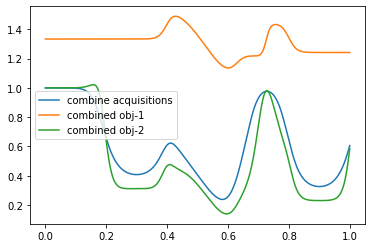

In [220]:
plt.plot(x, combine_acquisitions(acquisition(x, l, p_list_0, f_list_0), acquisition(x, l, p_list_1, f_list_1), ratio), label='combine acquisitions')
plt.plot(x, (combine_objectives(objective(x, p_list_0, f_list_0), objective(x, p_list_1, f_list_1), ratio) + l*(unif.pdf(x))) / (unif.pdf(x)), label='combined obj-1')
plt.plot(x, (term0+term1+term2), label='combined obj-2')
plt.legend()

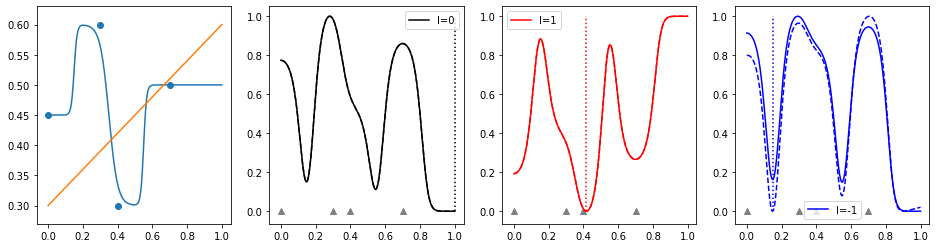

In [51]:
# ===================================================
# Acquisition Modifications to take cost into account
# ===================================================

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(16,4))

locs   = [0.0, 0.3, 0.4, 0.7]
f_list = [0.45, 0.6, 0.3, 0.5]

p_list = []
for loc in locs:
    p_list.append(norm(loc=loc, scale=0.05))


def cost(x):
    return 0.3 + 0.3*x

def relu(l, invert=True):
    if invert is False:
        if l > 0:
            return l
        else:
            return 0.
    else:
        if l < 0:
            return -l
        else:
            return 0.


ax1.scatter(locs, f_list)
ax2.scatter(locs, [0]*len(locs), marker='^', color='gray')
ax3.scatter(locs, [0]*len(locs), marker='^', color='gray')
ax4.scatter(locs, [0]*len(locs), marker='^', color='gray')

ax1.plot(x, sum_f_p(x, p_list, f_list)/sum_p(x, p_list))
ax1.plot(x, cost(x))

#ax2.plot(x, sum_f_p(x, p_list, f_list)/sum_p(x, p_list), label='objective func', color='gray', linestyle='--')
#ax2.scatter([0.3, 0.4, 0.7], [0.6, 0.3, 0.5], color='gray')


l = 0
numerator = sum_f_p(x, p_list, f_list) + l*(unif.pdf(x))
denominator = sum_p(x, p_list) + unif.pdf(x)
y = normalize(numerator / denominator)

ax2.plot(x, y, label='l=0', color='k')
ax2.legend()

y = normalize(numerator / denominator + relu(l)*cost(x))
ax2.plot(x, y, linestyle='--', color='k')
ax2.vlines(x=x[np.argmin(y)], ymin=0, ymax=1, linestyle=":", color='k')

l = 1
numerator = sum_f_p(x, p_list, f_list) + l*(unif.pdf(x))
denominator = sum_p(x, p_list) + unif.pdf(x)
y = normalize(numerator / denominator)

ax3.plot(x, y, label='l=1', color='r')
ax3.legend()

y = normalize(numerator / denominator + relu(l)*cost(x))
ax3.plot(x, y, linestyle='--', color='r')
ax3.vlines(x=x[np.argmin(y)], ymin=0, ymax=1, linestyle=":", color='r')


l = -1
numerator = sum_f_p(x, p_list, f_list) + l*(unif.pdf(x))
denominator = sum_p(x, p_list) + unif.pdf(x)
y = normalize(numerator / denominator)

ax4.plot(x, y, label='l=-1', color='b')
ax4.legend()

y = normalize(numerator / denominator + relu(l)*cost(x))
ax4.plot(x, y, linestyle='--', color='b')
ax4.vlines(x=x[np.argmin(y)], ymin=0, ymax=1, linestyle=":", color='b')

In [115]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity

class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [72]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

digits = load_digits()

3


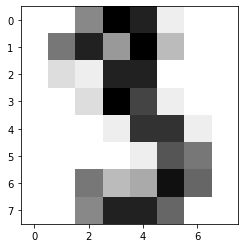

In [73]:
i = 3
plt.imshow(digits['data'][i].reshape((8,8)), cmap='gray_r')
print(digits['target'][i])

In [74]:
model = KDEClassifier()

In [75]:
model.fit(digits.data, digits.target)

[array([[0., 0., 5., ..., 0., 0., 0.],
       [0., 0., 1., ..., 3., 0., 0.],
       [0., 0., 3., ..., 4., 0., 0.],
       ...,
       [0., 0., 9., ..., 4., 0., 0.],
       [0., 0., 5., ..., 8., 1., 0.],
       [0., 0., 6., ..., 6., 0., 0.]]), array([[ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       [ 0.,  0.,  0., ..., 15.,  4.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 10.,  0.,  0.],
       [ 0.,  0.,  8., ...,  7.,  0.,  0.],
       [ 0.,  0.,  6., ...,  4.,  0.,  0.]]), array([[ 0.,  0.,  0., ..., 16.,  9.,  0.],
       [ 0.,  0.,  5., ..., 13., 12.,  4.],
       [ 0.,  0.,  8., ..., 12., 13.,  1.],
       ...,
       [ 0.,  3., 14., ..., 11.,  1.,  0.],
       [ 0.,  1., 10., ..., 10.,  9.,  0.],
       [ 0.,  0., 15., ...,  6.,  2.,  0.]]), array([[ 0.,  0.,  7., ...,  9.,  0.,  0.],
       [ 0.,  2.,  9., ..., 11.,  0.,  0.],
       [ 0.,  1.,  8., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  3., ...,  8.,  2.,  0.],
       [ 0., 

KDEClassifier()

In [76]:
model.predict([digits['data'][3]])

(1, 10)


AttributeError: 'list' object has no attribute 'shape'

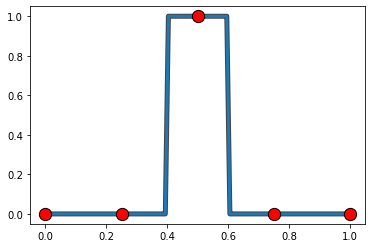

In [206]:
import numpy as np

def func1d(x):
    if 0.4 < x < 0.6:
        return 1
    return 0

x = np.linspace(0,1,100)
y = [func1d(xi) for xi in x]

plt.plot(x, y, linewidth=5, color='#444444')
plt.plot(x, y, linewidth=3)

x_samples = np.linspace(0,1,5)
y_samples = [func1d(xi) for xi in x_samples]
plt.scatter(x_samples, y_samples, zorder=5, s=150, c='r', edgecolor='k')

In [207]:
[np.array(x_samples)[np.array(y_samples) == yi] for yi in [0,1]]

[array([0.  , 0.25, 0.75, 1.  ]), array([0.5])]

In [214]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity

class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        self.classes_ = [0, 1]  # binary classification
        
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        X0 = np.array([X[y == 0]]).squeeze(0)
        X1 = np.array([X[y == 1]]).squeeze(0)

        self.model_0 = KernelDensity(bandwidth=self.bandwidth, kernel=self.kernel).fit(X0)
        self.model_1 = KernelDensity(bandwidth=self.bandwidth, kernel=self.kernel).fit(X1)
        
        self.logprior_0 = np.log(X0.shape[0] / X.shape[0])
        self.logprior_1 = np.log(X1.shape[0] / X.shape[0])
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([self.model_0.score_samples(X), self.model_1.score_samples(X)]).T
        logpriors = np.array([self.logprior_0, self.logprior_1]).T
        result = np.exp(logprobs + logpriors)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return [self.classes_[i] for i in np.argmax(self.predict_proba(X), axis=1)]
    
    
model = KDEClassifier(bandwidth=0.07)
model.fit(x_samples.reshape(-1,1), y_samples)
proba = model.predict_proba(x.reshape(-1,1))
y_pred = model.predict(x.reshape(-1,1))

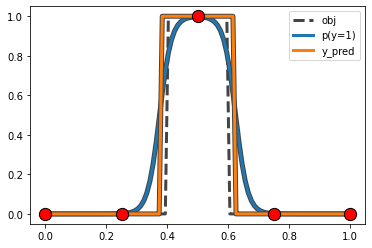

In [216]:
plt.plot(x, y, linewidth=3, color='#444444', linestyle='--', label='obj')

x_samples = np.linspace(0,1,5)
y_samples = [func1d(xi) for xi in x_samples]
plt.scatter(x_samples, y_samples, zorder=5, s=150, c='r', edgecolor='k')

plt.plot(x, proba.T[1], linewidth=5, color='#444444')
plt.plot(x, proba.T[1], linewidth=3, label='p(y=1)')

plt.plot(x, y_pred, linewidth=5, color='#444444')
plt.plot(x, y_pred, linewidth=3, label='y_pred')

plt.legend()

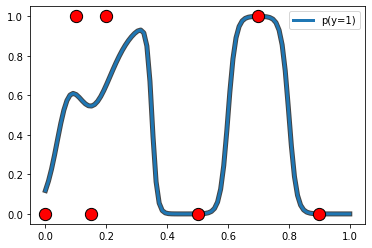

In [236]:
x_samples = np.array([0.0, 0.1, 0.15, 0.2, 0.5, 0.7, 0.9])
y_samples = [0,1,0,1,0,1,0]

model = KDEClassifier(bandwidth=0.05)
model.fit(x_samples.reshape(-1,1), y_samples)
proba = model.predict_proba(x.reshape(-1,1))

plt.scatter(x_samples, y_samples, zorder=5, s=150, c='r', edgecolor='k')

plt.plot(x, proba.T[1], linewidth=5, color='#444444')
plt.plot(x, proba.T[1], linewidth=3, label='p(y=1)')

plt.legend()

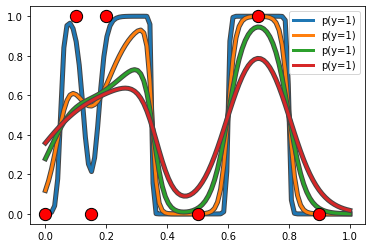

In [238]:
x_samples = np.array([0.0, 0.1, 0.15, 0.2, 0.5, 0.7, 0.9])
y_samples = [0,1,0,1,0,1,0]

plt.scatter(x_samples, y_samples, zorder=5, s=150, c='r', edgecolor='k')

for b in [0.025, 0.05, 0.075, 0.1]:
    model = KDEClassifier(bandwidth=b)
    model.fit(x_samples.reshape(-1,1), y_samples)
    proba = model.predict_proba(x.reshape(-1,1))

    plt.plot(x, proba.T[1], linewidth=5, color='#444444')
    plt.plot(x, proba.T[1], linewidth=3, label='p(y=1)')

plt.legend()

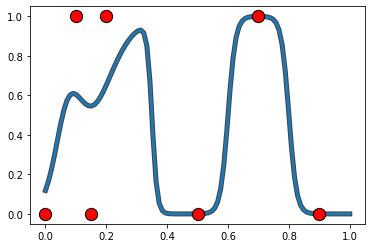

In [249]:
from scipy.stats import norm

class KDERegressor:
    def __init__(self, bandwidth=0.1):
        self.bandwidth = bandwidth
        
    def fit(self, X, y):
        self.y = y
        self.prob_list = []
        for Xi in X:
            self.prob_list.append(norm(loc=Xi, scale=self.bandwidth))
        
    def predict(self, X):
        den = np.sum([p.pdf(x) for p in self.prob_list], axis=0)
        num = np.sum([p.pdf(x)*y for p, y in zip(self.prob_list, self.y)], axis=0)
        return np.array(num / den)
    
    
x_samples = np.array([0.0, 0.1, 0.15, 0.2, 0.5, 0.7, 0.9])
y_samples = [0,1,0,1,0,1,0]

plt.scatter(x_samples, y_samples, zorder=5, s=150, c='r', edgecolor='k')

model = KDERegressor(bandwidth=0.05)
model.fit(x_samples.reshape(-1,1), y_samples)
y_pred = model.predict(x.reshape(-1,1))

plt.plot(x, y_pred, linewidth=5, color='#444444')
plt.plot(x, y_pred, linewidth=3)